# Adventures with Machine Learning
## Daniel Mejía Raigosa
### danielmejia55@gmail.com
#### November 13, 2017

## Machine Learning (ML)

+ "_field of study that gives computers the ability to learn without being explicitly programmed_".
  Arthur Samuel (1959)  

+ In brief _program computers to learn from data_

+ Long history of development (~50's)
    + OCR (Optical Character Recognition)
    + SPAM filters! (~90')
    

+ Got popular as computers got better

## Machine Learning is good for...

+ Problems that require fine tunning of available solutions

+ Complex problems with no good solution under traditional approach

+ Problems with fluctuating environtment

+ Get insights about large amounts of data

# Basic concepts

## Machine Learning workflow

![title](img/ML_Workflow.png) 

## Data in Machine Learning


## Data in Machine Learning

+ **Data** consists of **features** and **labels**
    + **Features** - features that characterize the data
    + **Labels** - features of interest for prediction/classification
+ Available data must be divided in,
    + **Training set** - data to train the algorithm
    + **Test set** - the data to test the algorithm


![title](img/ML_Data_sets.png) 

![title](img/ML_Data_division.png) 

## Elements of a Machine Learning Algorithm

## Elements of a Machine Learning Algorithm

+ **T** - Task : task at hand
+ **E** - Experience : the data to be manipulated
+ **P** - Performance measure : how good performed the algorithm

## Machine Learning Algorithm Learning classification

### Is the learning supervised?
+ Supervised
+ Unsupervised
+ Semisupervised
+ Reinforcement learning

### Can the algorithm learn on the fly?
+ Online learning
+ Batch learning

### How does it learn?
+ Instance based (by _heart_ or _similarity_)
+ Model based (by _example_ to _generalize_)

## Challenges to implement Machine Learning 

## Challenges to implement Machine Learning 

+ Bad algorithm
+ Bad data
    + Insufficient data
    + Non representative data
    + Poor quality
    + Irrelevant features in the data
    + Overfitting the training data
    + Underfitting the training data

## Non free lunch theorem

## Non free lunch theorem

+ A model is a simplified version of the observations, simplifications are meant to discard superfluos details. Discarding requires assumptions to be made
+ _"Under no assumptions about the data, there is no reason to prefer one model over any other"_ (Wolpert, 1996)
+ There is no model which _a priori_ guarantees to work better


# Libraries and frameworks for Machine Learning

# Libraries and frameworks for Machine Learning

+ Python libraries
    + numpy
    + pandas
    + matplotlib
    + seaborn    
+ Scikit-Learn (Scipy)
+ TensorFlow (Google)
+ Keras (Neural networks library)
+ Caffe (Deep learning - Berkeley-facebook Caffee)
+ Theano (Deep learning, tensor operations)
+ PyTorch (Deep neural networks, tensor operations, GPU support)

# Repositories and data bases with data for machine learning 

# Repositories and data bases with data for machine learning 

+ [Quandl](https://www.quandl.com/) Financial data, time series
+ [University of California - Machine Learning Repository](https://archive.ics.uci.edu/ml/index.php) - Data set generators and repositories
+ [Kaggle](www.kaggle.com) - Data sets and contests
+ [Github](www.github.com) - Not a DB, but still has several data sets
+ [Google?](www.google.com) - Search engines are useful too

# Google stock market predictor by linear regression

## Load required modules

In [1]:
# Adapted from the tutorial:
# https://pythonprogramming.net/forecasting-predicting-machine-learning-tutorial/?completed=/training-testing-machine-learning-tutorial/

import quandl, math
import numpy as np
import pandas as pd
from sklearn import preprocessing, svm
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

import matplotlib.pyplot as plt
from matplotlib import style
import datetime

style.use('ggplot')

## Load the data from Quandl and adjust the data set

Here we rename the columns and define our label, the `Adj. Close` (adjusting closing price). We want to predict the tendency by shifting in time the stock price time series by a value defined in `forecast_out`

In [2]:
df = quandl.get("WIKI/GOOGL")
df = df[['Adj. Open',  'Adj. High',  'Adj. Low',  'Adj. Close', 'Adj. Volume']]
df['HL_PCT'] = (df['Adj. High'] - df['Adj. Low']) / df['Adj. Close'] * 100.0
df['PCT_change'] = (df['Adj. Close'] - df['Adj. Open']) / df['Adj. Open'] * 100.0

In [3]:
df = df[['Adj. Close', 'HL_PCT', 'PCT_change', 'Adj. Volume']]
forecast_col = 'Adj. Close'
df.fillna(value=-99999, inplace=True)
forecast_out = int(math.ceil(0.01 * len(df)))
df['label'] = df[forecast_col].shift(-forecast_out)

In [4]:
# Show the data
df.tail()

Adj. Close    HL_PCT  PCT_change  Adj. Volume  label
Date                                                            
2017-11-15     1036.41  0.855839    0.136232     900695.0    NaN
2017-11-16     1048.47  1.312389    0.935740    1125995.0    NaN
2017-11-17     1035.89  1.667165   -1.325014    1286044.0    NaN
2017-11-20     1034.66  0.581834   -0.129344     850423.0    NaN
2017-11-21     1050.30  1.071123    0.986501    1075568.0    NaN

## Training the linear regressor

We need to shift the features to perform the prediction, recall that we want to predict the tendency by shifting in time the stock price time series. Dropping the `NaN` values is highly recommended.

In [5]:
# Adjust the data set
X = np.array(df.drop(['label'], 1))
X = preprocessing.scale(X)
X_lately = X[-forecast_out:]
X = X[:-forecast_out]

# Remove NaN from the data set
df.dropna(inplace=True)

# Define the label
y = np.array(df['label'])

Here we split the data set into train/test sets and perform the training of the linear regressor 

In [6]:
# Split in train/test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Train the actual Linear Regressor
clf = LinearRegression(n_jobs=-1)
clf.fit(X_train, y_train)

# Check the score
confidence = clf.score(X_test, y_test)

## Forecasting

With the regressor trained in `clf`, we can make a forecast for the google stock price for the adjusted close price 

In [7]:
# Predict the values for the next days
forecast_set = clf.predict(X_lately)
# replace nan values
df['Forecast'] = np.nan


# Format the time stamps of the data set
last_date = df.iloc[-1].name
last_unix = last_date.timestamp()
one_day = 86400
next_unix = last_unix + one_day

for i in forecast_set:
    next_date = datetime.datetime.fromtimestamp(next_unix)
    next_unix += 86400
    df.loc[next_date] = [np.nan for _ in range(len(df.columns)-1)]+[i]

## Plotting the forecast

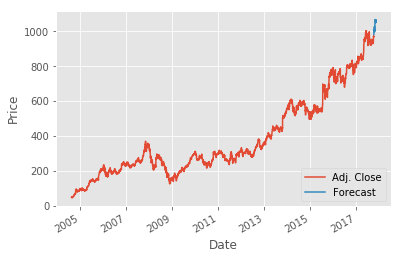

In [8]:
df['Adj. Close'].plot()
df['Forecast'].plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

## Zooming in

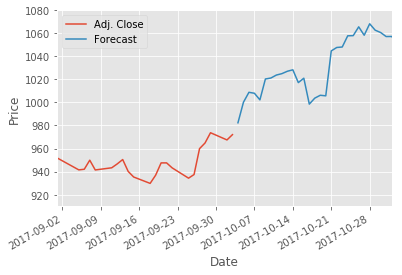

In [9]:
# Added manual zoom to the prediction
df['Adj. Close'].plot()
df['Forecast'].plot()
plt.legend(loc=2)
plt.xlabel('Date')
plt.ylabel('Price')
plt.xlim([datetime.date(2017,9,1).toordinal(),datetime.date(2017,11,1).toordinal()])
plt.ylim([910,1080])
plt.show()

# Developing a breast cancer predictor

In [10]:
import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

# Styling for matplotlib
matplotlib.style.use('ggplot')

## Load data from CSV file

In [11]:
# File description,
#
#Sample code number           
#Clump Thickness              
#Uniformity of Cell Size      
#Uniformity of Cell Shape     
#Marginal Adhesion            
#Single Epithelial Cell Size  
#Bare Nuclei                  
#Bland Chromatin              
#Normal Nucleoli              
#Mitoses                      
#Class

# Read CSV file
dataF = pd.read_csv("./breast-cancer-data/breast-cancer-wisconsin.data")

# Add column names according to the file description "breast-cancer-wisconsin.names"
dataF.columns=["sample","c_thickness","cell_size","cell_shape","adhesion","epitelial_size","nuclei","chromatin","nucleoli","mitoses","class"]

## Check the _health_ of the data

Checking for numerical features, since I'm willing to perform a Linear regression analysis

In [12]:
# Check for non numerical values in data
dataF.applymap(np.isreal).head()

sample  c_thickness  cell_size  cell_shape  adhesion  epitelial_size  \
0    True         True       True        True      True            True   
1    True         True       True        True      True            True   
2    True         True       True        True      True            True   
3    True         True       True        True      True            True   
4    True         True       True        True      True            True   

   nuclei  chromatin  nucleoli  mitoses  class  
0   False       True      True     True   True  
1   False       True      True     True   True  
2   False       True      True     True   True  
3   False       True      True     True   True  
4   False       True      True     True   True

All the data is numerical, but it seems that "nuclei" column was imported as strings.
We need to convert the data into numbers with the proper method as below

In [13]:
# For some reason the "nuclei" column is not numerical. Though the strings are numerical values.
# This performs the conversion from string to numerical values
dataF = dataF.apply(pd.to_numeric, errors='coerce')

In [14]:
# Delete NaN entries
# A better option is to fill NaN entries with the mean values for each field
#dataF = dataF.dropna()

Let us check the data again,

In [15]:
# Check again the numerical nature of the given DataFrame
dataF.applymap(np.isreal).head()

sample  c_thickness  cell_size  cell_shape  adhesion  epitelial_size  \
0    True         True       True        True      True            True   
1    True         True       True        True      True            True   
2    True         True       True        True      True            True   
3    True         True       True        True      True            True   
4    True         True       True        True      True            True   

   nuclei  chromatin  nucleoli  mitoses  class  
0    True       True      True     True   True  
1    True       True      True     True   True  
2    True       True      True     True   True  
3    True       True      True     True   True  
4    True       True      True     True   True

Since the column "sample" consist of a tag, we can drop it out of our dataset

In [16]:
# The sample column since it consists of sample tags and does not provide useful information
# for the modeling process
dataF=dataF.drop("sample",axis=1)

## Prepare the data for analysis

In [17]:
# Inspect the mean values
dataF.mean()

c_thickness       4.416905
cell_size         3.137536
cell_shape        3.210602
adhesion          2.809456
epitelial_size    3.217765
nuclei            3.548387
chromatin         3.438395
nucleoli          2.869628
mitoses           1.590258
class             2.690544
dtype: float64

Since we surely have NaN or empty fields on the data, lets fill them with the mean son the statistical propieties aren't deeply influenced,

In [18]:
# Fill NaN values with respecting mean value in order to not change mean properties
dataF.fillna(value=dataF.mean(),inplace=True)

# Inspect the data
dataF.head()

c_thickness  cell_size  cell_shape  adhesion  epitelial_size  nuclei  \
0            5          4           4         5               7    10.0   
1            3          1           1         1               2     2.0   
2            6          8           8         1               3     4.0   
3            4          1           1         3               2     1.0   
4            8         10          10         8               7    10.0   

   chromatin  nucleoli  mitoses  class  
0          3         2        1      2  
1          3         1        1      2  
2          3         7        1      2  
3          3         1        1      2  
4          9         7        1      4

In [19]:
# Inspect the tail of the data
dataF.tail()

c_thickness  cell_size  cell_shape  adhesion  epitelial_size  nuclei  \
693            3          1           1         1               3     2.0   
694            2          1           1         1               2     1.0   
695            5         10          10         3               7     3.0   
696            4          8           6         4               3     4.0   
697            4          8           8         5               4     5.0   

     chromatin  nucleoli  mitoses  class  
693          1         1        1      2  
694          1         1        1      2  
695          8        10        2      4  
696         10         6        1      4  
697         10         4        1      4

## Descriptive statistics on data

In [20]:
# Get some descriptive statistics from data
dataF.describe()

c_thickness   cell_size  cell_shape    adhesion  epitelial_size  \
count   698.000000  698.000000  698.000000  698.000000      698.000000   
mean      4.416905    3.137536    3.210602    2.809456        3.217765   
std       2.817673    3.052575    2.972867    2.856606        2.215408   
min       1.000000    1.000000    1.000000    1.000000        1.000000   
25%       2.000000    1.000000    1.000000    1.000000        2.000000   
50%       4.000000    1.000000    1.000000    1.000000        2.000000   
75%       6.000000    5.000000    5.000000    4.000000        4.000000   
max      10.000000   10.000000   10.000000   10.000000       10.000000   

           nuclei   chromatin    nucleoli     mitoses       class  
count  698.000000  698.000000  698.000000  698.000000  698.000000  
mean     3.548387    3.438395    2.869628    1.590258    2.690544  
std      3.603144    2.440056    3.055004    1.716162    0.951596  
min      1.000000    1.000000    1.000000    1.000000    2.000000  
25%      1.000000    2.000000    1.000000    1.000000    2.000000  
50%      1.000000    3.000000    1.000000    1.000000    2.000000  
75%      5.000000    5.000000    4.000000    1.000000    4.000000  
max     10.000000   10.000000   10.000000   10.000000    4.000000

## Get insights from correlations

In [21]:
# Show the correlation matrix numerically
dataF.corr()

c_thickness  cell_size  cell_shape  adhesion  epitelial_size  \
c_thickness        1.000000   0.645366    0.655089  0.486699        0.522108   
cell_size          0.645366   1.000000    0.906814  0.705397        0.751674   
cell_shape         0.655089   0.906814    1.000000  0.682871        0.719524   
adhesion           0.486699   0.705397    0.682871  1.000000        0.599402   
epitelial_size     0.522108   0.751674    0.719524  0.599402        1.000000   
nuclei             0.587729   0.686574    0.709385  0.664828        0.581030   
chromatin          0.558511   0.755824    0.736066  0.666759        0.616108   
nucleoli           0.536176   0.722699    0.719272  0.603132        0.628704   
mitoses            0.350176   0.458548    0.438756  0.417476        0.478975   
class              0.716509   0.817772    0.818794  0.696605        0.682618   

                  nuclei  chromatin  nucleoli   mitoses     class  
c_thickness     0.587729   0.558511  0.536176  0.350176  0.716509  
cell_size       0.686574   0.755824  0.722699  0.458548  0.817772  
cell_shape      0.709385   0.736066  0.719272  0.438756  0.818794  
adhesion        0.664828   0.666759  0.603132  0.417476  0.696605  
epitelial_size  0.581030   0.616108  0.628704  0.478975  0.682618  
nuclei          1.000000   0.675968  0.577103  0.338534  0.815904  
chromatin       0.675968   1.000000  0.665914  0.344118  0.756732  
nucleoli        0.577103   0.665914  1.000000  0.428185  0.712067  
mitoses         0.338534   0.344118  0.428185  1.000000  0.423008  
class           0.815904   0.756732  0.712067  0.423008  1.000000

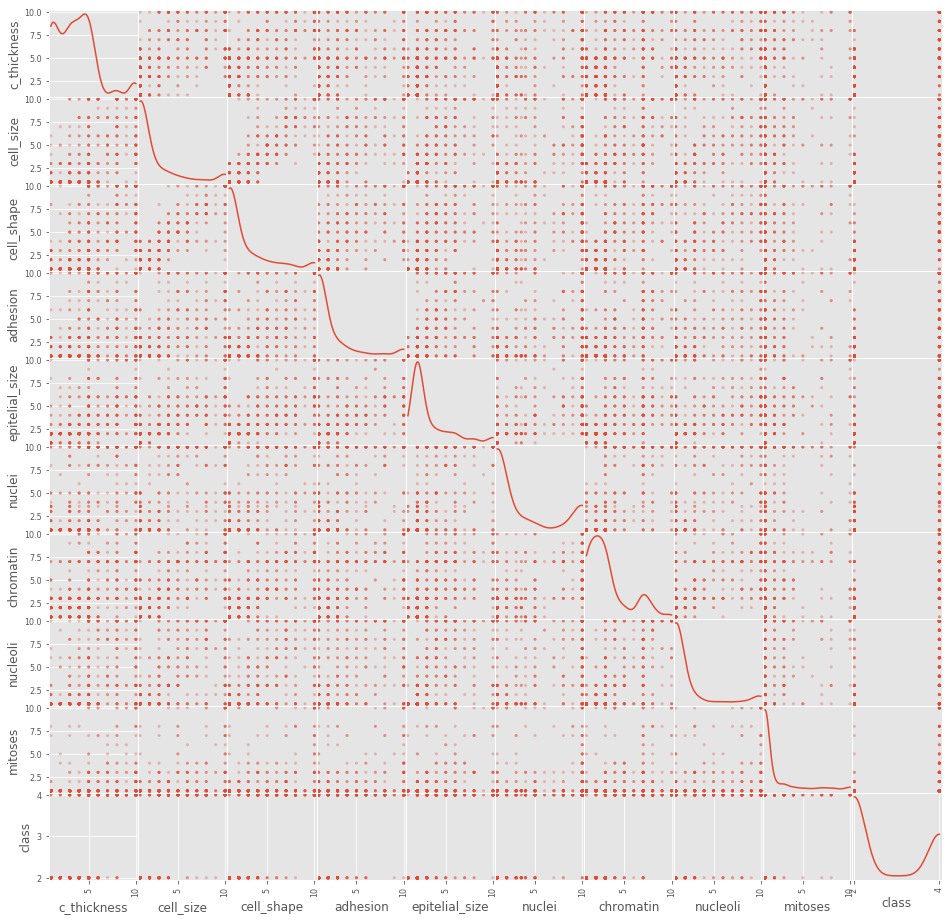

In [22]:
# Inspect the scatterplot of the data visually
scatter_matrix(dataF,alpha=0.35, figsize=(16, 16), diagonal='kde')
plt.show()

## Recalling the headers of the data set

In [23]:
# Recall culumn names to plot individual scatter plots
dataF.columns

Index(['c_thickness', 'cell_size', 'cell_shape', 'adhesion', 'epitelial_size',
       'nuclei', 'chromatin', 'nucleoli', 'mitoses', 'class'],
      dtype='object')

## Visual inspection of seemingly correlated features

[]

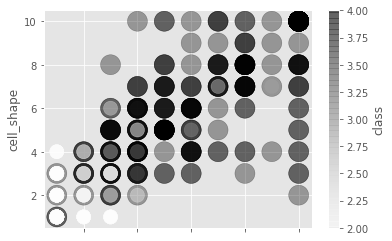

In [24]:
# From the scatter matrix there is an apparent correlation between the cell_shape and the cell_size
# I'm not sure about the meaning of the cell_shape field, how do they quantify that?
dataF.plot.scatter("cell_size","cell_shape",alpha=0.35,c='class',s=dataF['class']*100)
plt.plot()

## It is possible to get histograms of the data

[]

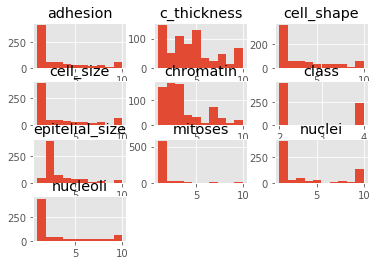

In [25]:
# It would be interesting to look the histograms for the data
dataF.hist()
plt.plot()

## Is the `class` correlated with the `cell_shape`?

[]

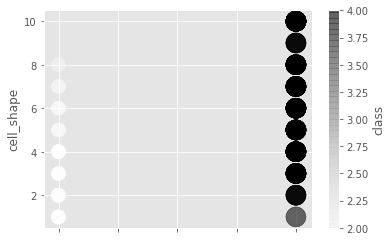

In [26]:
dataF.plot.scatter("class","cell_shape",alpha=0.35,c='class',s=dataF['class']*100)
#dataF.plot("class")
#dataF.plot("cell_shape")
plt.plot()

## Training a linear regression model

In [27]:
# import the scikit-learn stuff
from sklearn import preprocessing, svm
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [28]:
# What's the size of my data?
dataSize = len(dataF)
dataSize

698

In [29]:
# What would be the size of ~20% of the data?
testPercent = 0.4
testSize = int(np.ceil(testPercent * len(dataF)))

testSize

280

### Defining the label(s)

We want to predict the `class` of the sample as malignant or bening cell

In [30]:
## Picking a label data field
#############################

# The class tells us if the cells is malignant (4) or bening (2)
label="class"

# splitt dataframes into X and y
# X are the input parameters and y will be the predictions we would like to make
X = np.array(dataF.drop([label], 1),dtype=float)
y = np.array(dataF[label],dtype=float)

Here we split the data set into 80% to train and 20% to test the regressor

In [31]:
# scikit-learn provides a method to split data into train and tests sets
# I'm picking 80% of the data as train set and 20% as test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=testPercent)

### Training the linear regressor

Create a linear regressor instance and proceed to fit the data performing a confidence check

In [32]:
# Here we call a LinearRegression estimator to be trained
clf = LinearRegression()

# And use the train data to train the fitter
clf.fit(X_train, y_train)

# Here we verify the score of our fit
confidence = clf.score(X_test, y_test)
print(confidence)

0.806537165875


### Linear regressor metrics

It is possible to calculate interesting metrics on the linear regression

In [33]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import recall_score
#scoring = ['precision_macro', 'recall_macro']

#scores = cross_validate(clf,X,y, scoring=scoring,cv=5, return_train_score=False)
scores = cross_validate(clf,X,y)#, return_train_score=False)
sorted(scores.keys())
#print(scores)

['fit_time', 'score_time', 'test_score', 'train_score']

We can check the metrics associated with the `test_score`, the scoring with the test set of a three-fold cross validation

In [34]:
scores["test_score"]

array([ 0.75431972,  0.81704636,  0.86561582])

### Removing irrelevant features

Irrelevant features can add noise to the algorithm. Lets check the improvements by removing the features with weak correlation with the `class`

In [35]:
trimmedData = dataF[["cell_size","cell_shape","nuclei","class"]].copy()

In [36]:
trimmedData.head()

cell_size  cell_shape  nuclei  class
0          4           4    10.0      2
1          1           1     2.0      2
2          8           8     4.0      2
3          1           1     1.0      2
4         10          10    10.0      4

### Checking correlations

In [37]:
trimmedData.corr()

cell_size  cell_shape    nuclei     class
cell_size    1.000000    0.906814  0.686574  0.817772
cell_shape   0.906814    1.000000  0.709385  0.818794
nuclei       0.686574    0.709385  1.000000  0.815904
class        0.817772    0.818794  0.815904  1.000000

### Checking correlations visually

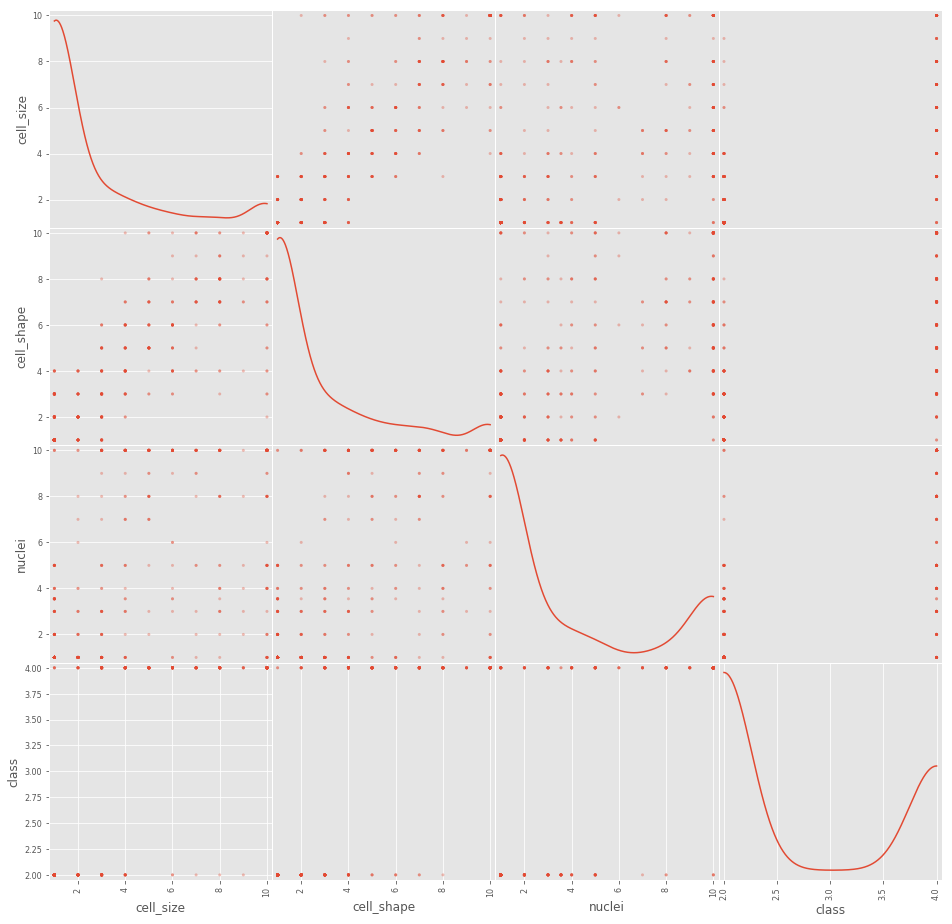

In [38]:
scatter_matrix(trimmedData,alpha=0.35, figsize=(16, 16), diagonal='kde')
plt.show()

### Training the linear regressor... again

Create a linear regressor instance and proceed to fit the data performing a confidence check

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [40]:
## Picking a label data field
#############################

# The class tells us if the cells is malignant (4) or bening (2)
label="class"

# splitt dataframes into X and y
# X are the input parameters and y will be the predictions we would like to make
#Xt = np.array(trimmedData.drop([label], 1),dtype=float)
#yt = np.array(trimmedData[label],dtype=float)
Xt = trimmedData.drop([label], 1).copy()
yt = trimmedData[label].copy()

### Generating the train and test data sets

In [41]:
Xt_train, Xt_test, yt_train, yt_test = train_test_split(Xt, yt, test_size=testPercent)

Here we train a new instance of the linear regresor and calculate metrics

In [42]:
# Here we call a LinearRegression estimator to be trained
clf1 = LinearRegression()

# And use the train data to train the fitter
clf1.fit(Xt_train, yt_train)

# Here we verify the score of our fit
confidence = clf1.score(Xt_test, yt_test)
print(confidence)

0.816890730651


Clearly removing features did not improve the classificator 